<a href="https://colab.research.google.com/github/ChintzRuparel/Computer-Vision/blob/main/Experiment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name - Chintan N Ruparel

Roll No. -  C086

Division - C


---



# Aim - To use GMM to track an object in the given video.

In [16]:
#For mathematical caculations.
import numpy as np

#To plot the image.
import matplotlib.pyplot as plt

#Computer vision version 2.
import cv2

from sklearn.mixture import  GaussianMixture

from skimage.color import rgb2gray

In [17]:
cap=cv2.VideoCapture('/content/slow_traffic_small.mp4')
frames=[]
frame_count=0
while True:
  ret,frame=cap.read()
  if frame is not None :
    frame=cv2.resize(frame,(150,150))
    frames.append(frame)
    frame_count=frame_count+1
  else:
    break

In [18]:
len(frames)

914

In [19]:
frames=np.array(frames)


Text(0.5, 1.0, 'Frame 0')

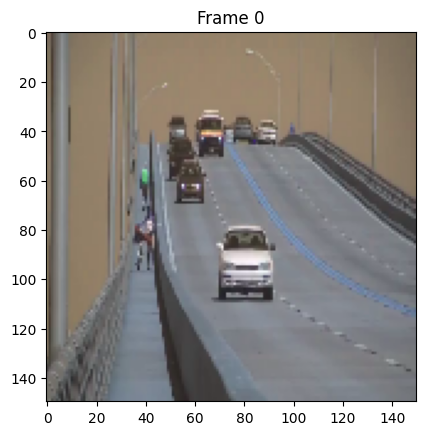

In [20]:
plt.imshow(frames[0])
plt.title("Frame 0")

In [21]:
sh=frames[0].shape
rw,col,ch=sh
rw,col,ch

(150, 150, 3)

In [22]:
#the gmm consists of combination of 2 Gaussian Curves
gmm=GaussianMixture(n_components=2)
background=np.zeros((sh))
#running the loop to first 100 frames and then running a graph of 2 gaussian filters and then fit the model and save in temp.
for i in range(rw):
  for j in range(col):
    for k in range(ch):
      temp=frames[0:100,i,j,k]
      temp=temp.reshape(temp.shape[0],1)
      gmm.fit(temp)
      #taking out means after fitting the model
      means=gmm.means_
      #
      weights=gmm.weights_
      index=np.argmax(weights)
      background[i][j][k]=int(means[index][0])

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to dup

array([[[125, 111,  90],
        [120, 104,  96],
        [ 88,  82,  77],
        ...,
        [120, 108,  88],
        [120, 108,  88],
        [119, 107,  87]],

       [[125, 111,  90],
        [121, 104,  96],
        [ 88,  82,  77],
        ...,
        [120, 108,  88],
        [120, 108,  88],
        [119, 107,  87]],

       [[125, 111,  90],
        [120, 104,  95],
        [ 88,  82,  77],
        ...,
        [120, 108,  88],
        [120, 108,  88],
        [119, 107,  87]],

       ...,

       [[114, 111, 103],
        [112, 110, 106],
        [ 91,  93,  93],
        ...,
        [114, 116, 123],
        [112, 114, 121],
        [112, 114, 121]],

       [[112, 108,  98],
        [111, 109, 104],
        [ 71,  74,  74],
        ...,
        [116, 118, 125],
        [113, 115, 122],
        [112, 114, 121]],

       [[108, 105,  99],
        [ 95,  95,  93],
        [ 78,  78,  78],
        ...,
        [114, 116, 123],
        [113, 115, 122],
        [113, 115, 122]]], dtype=uint8)
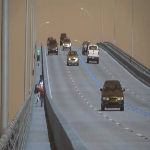

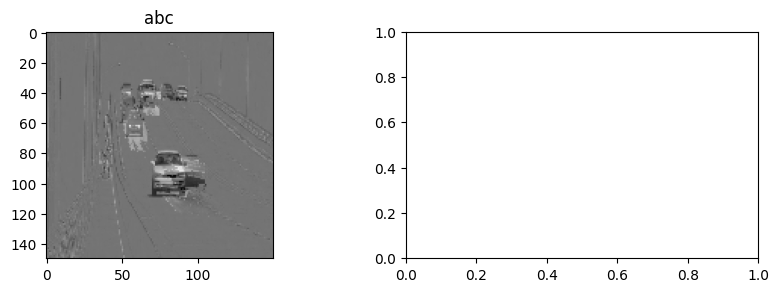

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.imshow(frames[0])
plt.title('abc')
foreground=frames[0]-background
foreground=rgb2gray(foreground)
plt.imshow(foreground,cmap='gray')
plt.subplot(3,2,2)
frames[900]